<h4> IMPORT NECESSARY LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
data = pd.read_csv('mail_data.csv')

In [7]:
data.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<h4> PREPROCESSING THE DATA

In [13]:
data['Category'] = data['Category'].map({'ham': 0, 'spam': 1})

<h4> SPLITTING DATA INTO LABELS AND FEATURES

In [15]:
X = data['Message']
y = data['Category']

<h4>SPLITTING DATA INTO TRAINING AND TESTING SETS

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

<h4>VECTORIZE TEXT USING TF-IDF

tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.fit_transform(X_test)

<h4>MODEL BUILDING

In [23]:
model = LogisticRegression(random_state=42)
model.fit(X_train_tfidf, y_train)

LogisticRegression(random_state=42)

<h4>MAKING PREDICTIONS

In [25]:
y_pred = model.predict(X_test_tfidf)

<h4>EVALUATE THE MODEL

In [27]:
accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test, y_pred)

In [47]:
print(accuracy*100)

86.48325358851675


In [49]:
print(classification)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1448
           1       0.00      0.00      0.00       224

    accuracy                           0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672



In [ ]:
<h4>VISUALIZING THE CONFUSION MATRIX

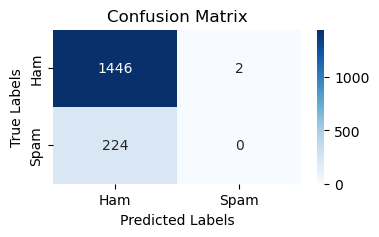

In [45]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()